## **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Import Raw Data**

In [5]:
df = pd.read_excel("/content/Blink_it_analysis.xlsx")

**Sample Data**

In [6]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


**Data Size**

In [10]:
df.shape

(8523, 12)

**Field Info**

In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

**Data Types**

In [8]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


## **Data Cleaning**

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat']


In [14]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat': 'Low Fat','reg': 'Regular'})

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## **Business Requirements**

## **KPI's Requirements**

In [26]:
# total sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# No of items
no_of_items_sold = df['Sales'].count()

# Average Ratings
avg_rating = df['Rating'].mean()

# Display

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold}")
print(f"Average Rating: {avg_rating:,.0f}")

Total Sales: $1,201,681
Average Sales: $141
No of Items Sold: 8523
Average Rating: 4


## **Charts Requirements**

**Total Sales by Fat Content**

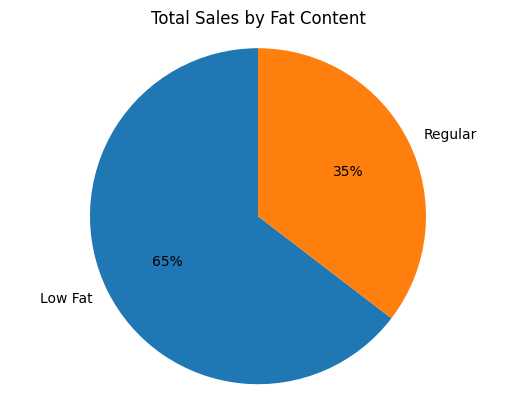

In [29]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%.0f%%', startangle=90)
plt.title('Total Sales by Fat Content')
plt.axis('equal')
plt.show()

**Total Sales by Item Type**

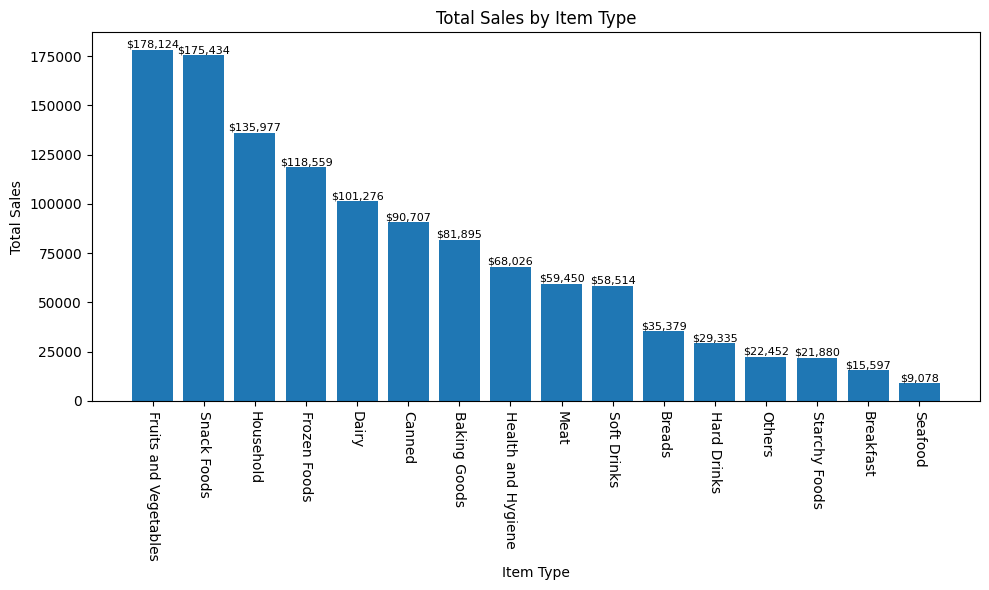

In [38]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Fat Content by Outlet for Total Sales**

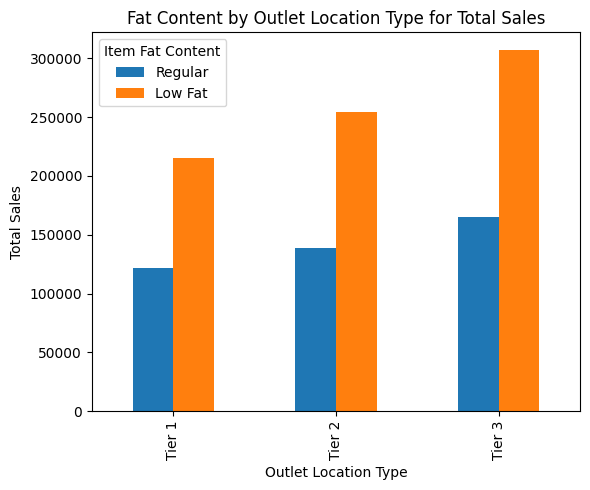

In [65]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(6, 5), title='Outlet Type by Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Fat Content by Outlet Location Type for Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


**Total Sales by Outlet Establishment**

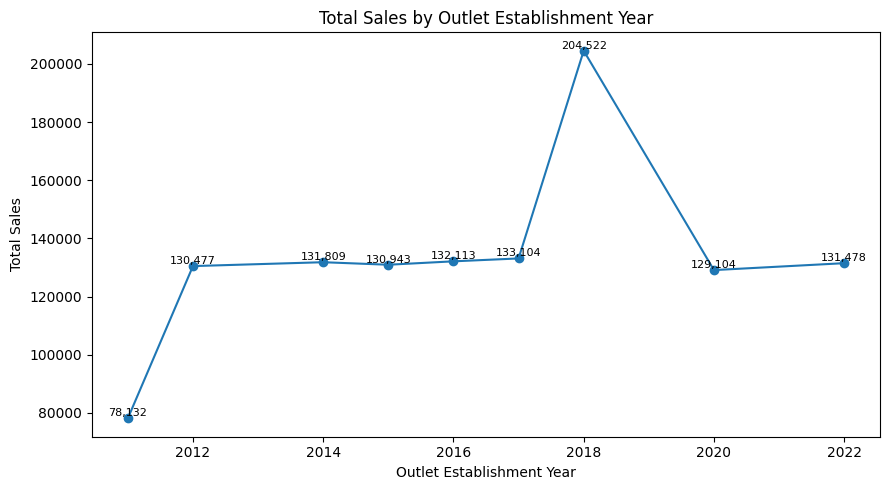

In [52]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Sales by Outlet Size**

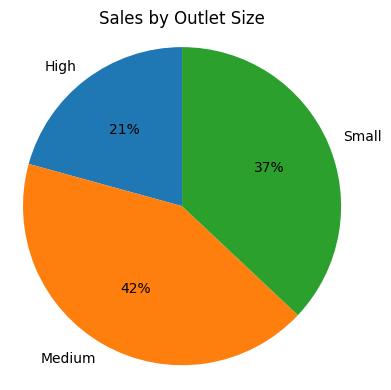

In [66]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%.0f%%', startangle=90)
plt.title('Sales by Outlet Size')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Sales by Outlet Location**

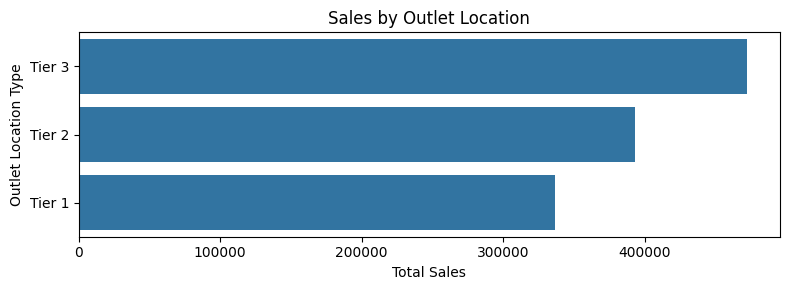

In [64]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Sales' ,y='Outlet Location Type', data=sales_by_location)

plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.title('Sales by Outlet Location')

plt.tight_layout()
plt.show()